# Introduction to pandas
Adapted from "10 minutes to pandas":
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min

See also the cheatsheet:
https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [2]:
import numpy as np
import pandas as pd

Pandas provides you with two handy data structures:
- series
- data frame

which can store 1-dimensional and 2-dimensional labelled arrays.
NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.
Which means data frames can store different types of objects in each column,
e.g., integers, reals, booleans, strings, dates.

## Object creation
Creating a Series by passing a list of values, letting pandas create 
a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array,
with a datetime index and labeled columns:

In [4]:
dates = pd.date_range('20191001',periods=16)
dates

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
               '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.rand(16,4),index=dates,columns=list('ABCD'))
df
# ?np.random.randint
# np.random.randint(0,high=10,size=(3,4))

,A,B,C,D
2019-10-01,0.942403,0.743147,0.265833,0.823443
2019-10-02,0.257801,0.431394,0.145566,0.974387
2019-10-03,0.290255,0.729068,0.524967,0.793271
2019-10-04,0.259951,0.402264,0.753921,0.922529
2019-10-05,0.627768,0.846261,0.959468,0.672191
2019-10-06,0.573486,0.691725,0.226067,0.060919
2019-10-07,0.810794,0.993903,0.128705,0.132478
2019-10-08,0.169163,0.265466,0.626580,0.501530
2019-10-09,0.617294,0.959314,0.038931,0.422753
2019-10-10,0.317476,0.099119,0.717232,0.126414


If you don't like the column names, you can use an array of strings

In [8]:
df = pd.DataFrame(np.random.rand(16,4),index=dates,columns=list(['A','B','Cyder','D']))
df

,A,B,Cyder,D
2019-10-01,0.199455,0.944134,0.306606,0.915470
2019-10-02,0.801711,0.896039,0.637553,0.102936
2019-10-03,0.301331,0.338066,0.809526,0.940079
2019-10-04,0.248794,0.218964,0.247322,0.880936
2019-10-05,0.737916,0.227465,0.510530,0.791399
2019-10-06,0.864473,0.104877,0.262396,0.260462
2019-10-07,0.896652,0.660303,0.241162,0.764813
2019-10-08,0.713356,0.841544,0.221016,0.364391
2019-10-09,0.116807,0.030281,0.506326,0.664463
2019-10-10,0.201539,0.150880,0.513292,0.247200


or rename only some of the columns:

In [9]:
df=df.rename(columns={'Cyder':'buba'})
df

,A,B,buba,D
2019-10-01,0.199455,0.944134,0.306606,0.915470
2019-10-02,0.801711,0.896039,0.637553,0.102936
2019-10-03,0.301331,0.338066,0.809526,0.940079
2019-10-04,0.248794,0.218964,0.247322,0.880936
2019-10-05,0.737916,0.227465,0.510530,0.791399
2019-10-06,0.864473,0.104877,0.262396,0.260462
2019-10-07,0.896652,0.660303,0.241162,0.764813
2019-10-08,0.713356,0.841544,0.221016,0.364391
2019-10-09,0.116807,0.030281,0.506326,0.664463
2019-10-10,0.201539,0.150880,0.513292,0.247200


Creating a DataFrame by passing a dictionary of objects 
that can be converted to series-like.

In [6]:
df2 = pd.DataFrame({'A': 1.,
    ...:                    'B': pd.Timestamp('20130102'),
   ...:                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
   ...:                     'D': np.array([3] * 4, dtype='int32'),
   ...:                     'E': pd.Categorical(["test", "train", "test", "train"]),
   ...:                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### Manipulate

The data frame can be sorted in several ways, e.g.:
- by row or column names
- by a selected row or column values

In [35]:
# df2.sort_index(axis=1,ascending=True)
# df2.sort_values(by='E',ascending=False)
# df.sort_values(by='2019-10-12',axis=1,ascending=False)

,B,A,buba,D
2019-10-01,0.886582,0.939175,0.533153,0.765497
2019-10-02,0.607290,0.876374,0.325079,0.887634
2019-10-03,0.253545,0.170384,0.452498,0.148827
2019-10-04,0.783512,0.634689,0.058327,0.749859
2019-10-05,0.191081,0.003723,0.619222,0.058100
2019-10-06,0.480161,0.472705,0.748015,0.322100
2019-10-07,0.968769,0.078044,0.838767,0.023229
2019-10-08,0.397543,0.796217,0.416777,0.214413
2019-10-09,0.163434,0.190408,0.106236,0.654870
2019-10-10,0.895548,0.769656,0.028251,0.530253


Now read the documentation (or cheatsheet) and explain what happens in each of the following lines:

In [50]:
# df.T
# pd.melt(df)
# df2.pivot(columns='E')
# df.drop(columns=['A'])

### Access data
There are many ways to access data frame entries.

Let's try different ways of selecting the first column:
- by column name (which became a method associated with the data frame object)
- by column name
- using .loc method (select all rows and column named 'A')
- using .iloc method (select all rows and the first column)

Uncomment each line below and check results:

In [31]:
# df.A
# df['A']
# df.loc[:,'A']
# df.iloc[:,0]

You can access range of entries:
- by specifying start:end using names
- by specifying start:end using integer row indices
- by inserting arrays of indices (don't need to be consecutive)
- by specifying entries with an array of boolean values (True = include data, False = exclude data)

Uncomment each line below separately to see the results

In [39]:
# df[0:3]
# df['20191001':'20191003']
# df.iloc[0:3, :]
# df.iloc[[1,4,13],[0,2]]
# df.iloc[:,[True,True,False,False]]

You can look up the column names using regular expression
(provided you were smart naming them).

Let's find all the columns starting with an uppercase letter:

In [23]:
df.filter(regex='[A-Z]')

,A,B,D
2019-10-01,0.199455,0.944134,0.915470
2019-10-02,0.801711,0.896039,0.102936
2019-10-03,0.301331,0.338066,0.940079
2019-10-04,0.248794,0.218964,0.880936
2019-10-05,0.737916,0.227465,0.791399
2019-10-06,0.864473,0.104877,0.260462
2019-10-07,0.896652,0.660303,0.764813
2019-10-08,0.713356,0.841544,0.364391
2019-10-09,0.116807,0.030281,0.664463
2019-10-10,0.201539,0.150880,0.247200


Multiple entries can be overwritten simultaneously.

Explain what will change after running the following lines:

In [26]:
df.loc[dates[0], 'D']=1.2
df.at[dates[0], 'B':'buba']=0.3
df['A']=3
df

,A,B,buba,D
2019-10-01,3,0.300000,0.300000,1.200000
2019-10-02,3,0.896039,0.637553,0.102936
2019-10-03,3,0.338066,0.809526,0.940079
2019-10-04,3,0.218964,0.247322,0.880936
2019-10-05,3,0.227465,0.510530,0.791399
2019-10-06,3,0.104877,0.262396,0.260462
2019-10-07,3,0.660303,0.241162,0.764813
2019-10-08,3,0.841544,0.221016,0.364391
2019-10-09,3,0.030281,0.506326,0.664463
2019-10-10,3,0.150880,0.513292,0.247200


### Select data

You can perform logical operations on multiple data frame entries at the same time:

In [29]:
df.B>0

2019-10-01    True
2019-10-02    True
2019-10-03    True
2019-10-04    True
2019-10-05    True
2019-10-06    True
2019-10-07    True
2019-10-08    True
2019-10-09    True
2019-10-10    True
2019-10-11    True
2019-10-12    True
2019-10-13    True
2019-10-14    True
2019-10-15    True
2019-10-16    True
Freq: D, Name: B, dtype: bool

Since we can access data with arrays of logical values, then...

Explain what happens here:

In [40]:
df[df.B>0.3]

,A,B,buba,D
2019-10-02,3,0.896039,0.637553,0.102936
2019-10-03,3,0.338066,0.809526,0.940079
2019-10-07,3,0.660303,0.241162,0.764813
2019-10-08,3,0.841544,0.221016,0.364391
2019-10-11,3,0.756928,0.930413,0.852314
2019-10-12,3,0.548275,0.337590,0.515698
2019-10-13,3,0.635733,0.137816,0.067704
2019-10-14,3,0.855546,0.225112,0.311566
2019-10-15,3,0.649615,0.630545,0.427537


or here (uncomment each line):

In [ ]:
# df[df.B+df.D>=df.A*df.buba]
# df[df>.3]
# df[df>.3].sort_values(by='B',na_position='first')

If the data frame contains objects encoded as different types,
you can select each type separately.

For instance, let's take only categorical variables:

In [41]:
df2.select_dtypes(include='category')

,E
0,test
1,train
2,test
3,train


### Viewing data
If the data is too big you might want to have only a glimpse on a couple of instances:

In [42]:
# df.head()
# df.tail(3)

or get familiar with the column and row names:

In [47]:
# df.index
# df.columns

You might want to have a look at some summary statistics:

In [43]:
df.describe()

,A,B,buba,D
count,16.0,16.000000,16.000000,16.000000
mean,3.0,0.467346,0.441775,0.558626
std,0.0,0.293482,0.231618,0.327352
min,3.0,0.030281,0.137816,0.067704
25%,3.0,0.225340,0.245782,0.298790
50%,3.0,0.443170,0.421958,0.531108
75%,3.0,0.684459,0.575993,0.806628
max,3.0,0.896039,0.930413,1.200000


Or at least at some of the ones that are of interest:

In [44]:
# df.sum()
# df.count()
df.mean()

A       3.000000
B       0.467346
buba    0.441775
D       0.558626
dtype: float64

If you haven't loaded Matplotlib (and you should have!)
you still have several options to plot the data:

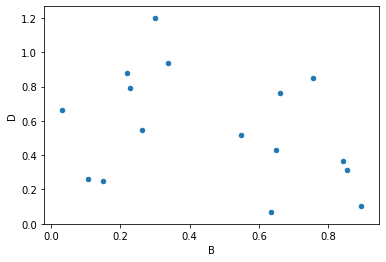

In [49]:
# df.plot.box()
# df.plot.hist()
df.plot.scatter(x='B',y='D')